In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [94]:
disease_df = pd.read_csv('framingham.csv')
disease_df = disease_df.dropna()
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [95]:
# Drop education column & rename male column to Sex_male
disease_df.drop(columns=['education'],inplace = True, axis =1)
disease_df.rename(columns = {'male':'Sex_male'}, inplace = True)
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [96]:
print(disease_df.TenYearCHD.value_counts())

0    3101
1     557
Name: TenYearCHD, dtype: int64


In [97]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   currentSmoker    3658 non-null   int64  
 3   cigsPerDay       3658 non-null   float64
 4   BPMeds           3658 non-null   float64
 5   prevalentStroke  3658 non-null   int64  
 6   prevalentHyp     3658 non-null   int64  
 7   diabetes         3658 non-null   int64  
 8   totChol          3658 non-null   float64
 9   sysBP            3658 non-null   float64
 10  diaBP            3658 non-null   float64
 11  BMI              3658 non-null   float64
 12  heartRate        3658 non-null   float64
 13  glucose          3658 non-null   float64
 14  TenYearCHD       3658 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 457.2 KB


# Splitting the dataset into test and train sets

In [106]:
x_data = np.asarray(disease_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y_data = np.asarray(disease_df['TenYearCHD'])

from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_data_scalling = scaler.fit_transform(x_data)  # feature scaling
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

# Problem without scalling
Here I am training a model with these features,
 - age --> ranges from 20-80
 -glucose --> ranges from 70-300
so, if I don't scale them:
 - The model might think glucose is more important because its values are bigger
 - The learning algorithm can become biased towards features with larger numerical ranges.

# With Scalling:
 - it makes each feature's Mean = 0 and Standard deviation = 1. So all features now contribute equally.

In [107]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_data_scalling, y_data, test_size = 0.3, random_state = 4)

print('Train Set:', x_train.shape,y_train.shape)
print('Test Set:', x_test.shape,y_test.shape)

Train Set: (2560, 6) (2560,)
Test Set: (1098, 6) (1098,)


# EDA

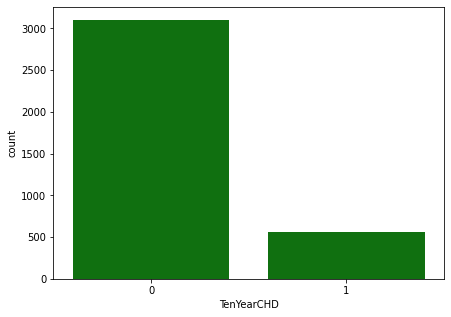

In [108]:
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD', data = disease_df, color = "green")
plt.show()

Above figure shows a high imbalance in the dataset, where the majority
individuals do not have heat disease (0) while only a small number have heart disease(1).

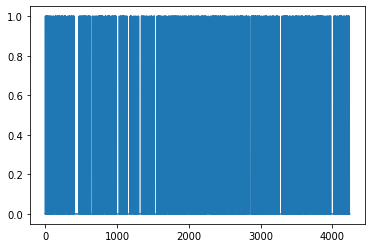

In [109]:
# counting number of patients affected by CHD. (0= not affected, 1= affected)
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

-- Blue bars indicate the absence of heart disease.
-- white space indicate the presence of heart disease.

In [118]:
# fitting logistic regression model

from sklearn.linear_model import LogisticRegression
import joblib

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
joblib.dump(logreg,'HeartDiseasePrediction.pkl')


['HeartDiseasePrediction.pkl']

In [119]:
# predicting test set
y_pred = logreg.predict(x_test)

In [120]:
# Evaluating Logistic regression model

from sklearn.metrics import accuracy_score
print('Accuracy of the model is:',accuracy_score(y_test,y_pred))

Accuracy of the model is: 0.843351548269581


The details for confusion matrix is :
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       922
           1       0.60      0.07      0.12       176

    accuracy                           0.84      1098
   macro avg       0.72      0.53      0.52      1098
weighted avg       0.81      0.84      0.79      1098



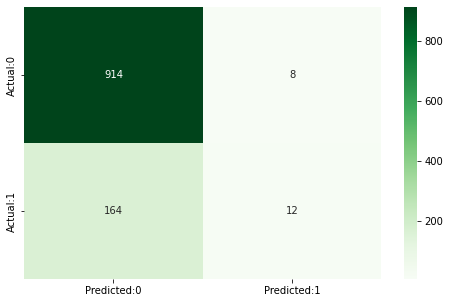

In [121]:
# plotting consusion matrix

from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is :')
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data = cm, columns=['Predicted:0','Predicted:1'],index =['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot = True,fmt='d',cmap='Greens')
plt.show()